In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
# Step 2: Open and Read the JSON File
with open('D:/shuvo/bangla_news_classification/dataset/pro-part-2.json', 'r') as json_file:
    json_data = json_file.read()

# Step 3: Parse the JSON Data
parsed_data = json.loads(json_data)

In [3]:
# Step 4: Print the Content
print(parsed_data[:2])

[{'tags': [], 'headline': 'পাইকারি বাজারে কমলেও খুচরা পর্যায়ে কমেনি পেঁয়াজের দাম', 'content_type': 'story', 'content_id': '80b2ef5e-70e7-4a4b-b1a4-81817e379cfa', 'url': 'https://www.prothomalo.com/business/পাইকারি-বাজারে-কমলেও-খুচরা-পর্যায়ে-কমেনি-পেঁয়াজের-দাম', 'body': ['<p>ভারত পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেওয়ায় দেশের পাইকারি বাজারে সব ধরনের পেঁয়াজের দাম কমে এসেছে। কিন্তু খুচরা বিক্রেতারা এখনো পেঁয়াজ বিক্রি করছেন চড়া দামে।রাজধানীর কয়েকটি কাঁচাবাজারে গতকাল বুধবার দেশি পেঁয়াজ ৪০ এবং আমদানি করা ভারতীয় পেঁয়াজ ৩৫ থেকে ৩৬ টাকায় বিক্রি হতে দেখা গেছে।ভারতের কৃষকদের বিক্ষোভ ও দাবির মুখে গত মঙ্গলবার সেই দেশের সরকার পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেয়। এর আগে ৯ সেপ্টেম্বর ভারত পেঁয়াজ রপ্তানি বন্ধ করে, যে কারণে ভারতে পেঁয়াজের দাম কমে যায়। প্রতি কুইন্টাল (১০০ কেজি) পেঁয়াজের দাম এক হাজার রুপি থেকে কমে ৪০০ রুপিতে নেমে আসে।ভারত রপ্তানি নিষেধাজ্ঞা আরোপের পর ঢাকায় পেঁয়াজের সবচেয়ে বড় পাইকারি বাজার শ্যামবাজারে পাইকারি দর দাঁড়ায় প্রতি কেজি দেশি পেঁয়াজ ৩৬ থেকে ৩৭ টাকা এবং ভারতীয় পেঁয়াজ ৩৫ থেকে 

In [4]:
# Step 2: Create a DataFrame from JSON Data
df = pd.DataFrame(parsed_data)
df.head()

,tags,headline,content_type,content_id,url,body,added_time,updated_time,general_type
0,[],পাইকারি বাজারে কমলেও খুচরা পর্যায়ে কমেনি পেঁয়া...,story,80b2ef5e-70e7-4a4b-b1a4-81817e379cfa,https://www.prothomalo.com/business/পাইকারি-বা...,[<p>ভারত পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে ন...,1585270322047,1600169881202,[business]
1,[],মোড়কজাত মসলায় বেশি দাম রাখা হচ্ছে,story,4c255f46-8db9-48b1-abdf-6e66d5cb42e8,https://www.prothomalo.com/business/মোড়কজাত-মস...,[<p>খোলা মসলার তুলনায় মোড়কজাত মসলার দাম যতটুকু...,1585270321806,1600169880906,[business]
2,[],লক্ষ্য করুন,story,2e0e128a-2c12-45a8-b6af-6786979d3d8d,https://www.prothomalo.com/feature/ananda/লক্ষ...,[<p>গত সপ্তাহের আনন্দ পাতায় ‘একজন ছায়াবতী’ নাট...,1585270320524,1600169880613,"[feature, ananda]"
3,[],কোপেনিকের ক্যাপ্টেন,story,50862225-dd84-4c23-a06c-35f3e9c9edef,https://www.prothomalo.com/feature/ananda/কোপে...,[<p>পাশের ছবিটি নাগরিক নাট্যসম্প্রদায়ের কোপেনি...,1585270320284,1600169880323,"[feature, ananda]"
4,[],মঞ্চে রিপার্টরি থিয়েটারের আগ্রহ বাড়ছে,story,928f06c2-93d0-40d9-a487-d68bbb13a0a7,https://www.prothomalo.com/feature/ananda/মঞ্চ...,[<p>বাংলা থিয়েটারের জয়জয়কার যেই পশ্চিমবঙ্গে এখ...,1585270320030,1600169880008,"[feature, ananda]"


In [5]:
df.shape, df.columns

((90000, 9),
 Index(['tags', 'headline', 'content_type', 'content_id', 'url', 'body',
        'added_time', 'updated_time', 'general_type'],
       dtype='object'))

In [6]:
df['general_type'] = df['general_type'].str[0]
df['body'] = df['body'].str[0].str.replace('<p>', '').replace('</p>', '')
df

,tags,headline,content_type,content_id,url,body,added_time,updated_time,general_type
0,[],পাইকারি বাজারে কমলেও খুচরা পর্যায়ে কমেনি পেঁয়া...,story,80b2ef5e-70e7-4a4b-b1a4-81817e379cfa,https://www.prothomalo.com/business/পাইকারি-বা...,ভারত পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেওয়া...,1585270322047,1600169881202,business
1,[],মোড়কজাত মসলায় বেশি দাম রাখা হচ্ছে,story,4c255f46-8db9-48b1-abdf-6e66d5cb42e8,https://www.prothomalo.com/business/মোড়কজাত-মস...,খোলা মসলার তুলনায় মোড়কজাত মসলার দাম যতটুকু বেশ...,1585270321806,1600169880906,business
2,[],লক্ষ্য করুন,story,2e0e128a-2c12-45a8-b6af-6786979d3d8d,https://www.prothomalo.com/feature/ananda/লক্ষ...,গত সপ্তাহের আনন্দ পাতায় ‘একজন ছায়াবতী’ নাটকটির...,1585270320524,1600169880613,feature
3,[],কোপেনিকের ক্যাপ্টেন,story,50862225-dd84-4c23-a06c-35f3e9c9edef,https://www.prothomalo.com/feature/ananda/কোপে...,পাশের ছবিটি নাগরিক নাট্যসম্প্রদায়ের কোপেনিকের ...,1585270320284,1600169880323,feature
4,[],মঞ্চে রিপার্টরি থিয়েটারের আগ্রহ বাড়ছে,story,928f06c2-93d0-40d9-a487-d68bbb13a0a7,https://www.prothomalo.com/feature/ananda/মঞ্চ...,বাংলা থিয়েটারের জয়জয়কার যেই পশ্চিমবঙ্গে এখনো স...,1585270320030,1600169880008,feature
...,...,...,...,...,...,...,...,...,...
89995,[],আদিবাসীদের জমিতে ইট কারখানা স্থাপন বন্ধের নির্দেশ,story,6de96aec-9b9f-4177-b3a7-fd728aa70205,https://www.prothomalo.com/bangladesh/আদিবাসীদ...,মধুপুর গড় এলাকার ইদিলপুরে আদিবাসীদের কৃষিজমিতে...,1588934990896,1600200490259,bangladesh
89996,[],মহান শিক্ষা দিবসে সর্বজনীন শিক্ষাব্যবস্থার দাবি,story,6de2ea78-b363-4902-b245-4f41b9d08b65,https://www.prothomalo.com/bangladesh/মহান-শিক...,"সর্বজনীন, বৈষম্যহীন, বিজ্ঞানভিত্তিক একই ধারার ...",1588934990544,1600200489944,bangladesh
89997,[],উপজেলা পরিষদ কার্যালয়ে কর্মকর্তাবিহীন কার্যদিবস!,story,b13d9a3c-7ee2-4251-b61f-d020d788d76c,https://www.prothomalo.com/bangladesh/উপজেলা-প...,রোববার সকাল নয়টা ৩০ মিনিট! উপজেলা পরিষদে কোনো ...,1588934990161,1600200489614,bangladesh
89998,[],ফেনীতে দুই মাদক ব্যবসায়ীকে দণ্ড,story,1fdf3e53-3e1e-49b8-a0b2-ceb408179e85,https://www.prothomalo.com/bangladesh/ফেনীতে-দ...,ফেনীতে গতকাল সোমবার দুই মাদক ব্যবসায়ীকে ভ্রাম্...,1588934989831,1600200489290,bangladesh


In [7]:
df = df[['general_type', 'body']]
df

,general_type,body
0,business,ভারত পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেওয়া...
1,business,খোলা মসলার তুলনায় মোড়কজাত মসলার দাম যতটুকু বেশ...
2,feature,গত সপ্তাহের আনন্দ পাতায় ‘একজন ছায়াবতী’ নাটকটির...
3,feature,পাশের ছবিটি নাগরিক নাট্যসম্প্রদায়ের কোপেনিকের ...
4,feature,বাংলা থিয়েটারের জয়জয়কার যেই পশ্চিমবঙ্গে এখনো স...
...,...,...
89995,bangladesh,মধুপুর গড় এলাকার ইদিলপুরে আদিবাসীদের কৃষিজমিতে...
89996,bangladesh,"সর্বজনীন, বৈষম্যহীন, বিজ্ঞানভিত্তিক একই ধারার ..."
89997,bangladesh,রোববার সকাল নয়টা ৩০ মিনিট! উপজেলা পরিষদে কোনো ...
89998,bangladesh,ফেনীতে গতকাল সোমবার দুই মাদক ব্যবসায়ীকে ভ্রাম্...


In [8]:
df.dropna(inplace=True)
# Remove duplicates in 'body' column, keeping the first occurrence
df.drop_duplicates(subset='body', keep='first',inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(), df.shape

C:\Users\SSROY\AppData\Local\Temp\ipykernel_11888\3287021994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\SSROY\AppData\Local\Temp\ipykernel_11888\3287021994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='body', keep='first',inplace=True)


(  general_type                                               body
 0     business  ভারত পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেওয়া...
 1     business  খোলা মসলার তুলনায় মোড়কজাত মসলার দাম যতটুকু বেশ...
 2      feature  গত সপ্তাহের আনন্দ পাতায় ‘একজন ছায়াবতী’ নাটকটির...
 3      feature  পাশের ছবিটি নাগরিক নাট্যসম্প্রদায়ের কোপেনিকের ...
 4      feature  বাংলা থিয়েটারের জয়জয়কার যেই পশ্চিমবঙ্গে এখনো স...,
 (88499, 2))

In [9]:
n = len(df['body'].unique())
unique_label = len(df['general_type'].unique())
n,unique_label

(88499, 11)

In [10]:
df['general_type'].unique()

array(['business', 'feature', 'sports', 'bangladesh', 'education',
       'old-prothomalo', 'entertainment', 'opinion', 'world', 'onnoalo',
       'life'], dtype=object)

In [11]:
# df = df.sample(m, replace=False)
# df.reset_index(inplace=True)
# # df.drop(['level_0', 'index'], inplace = True)
# df

In [12]:
# Print the content of the first 'body' entry
first_body_content = df.loc[0, 'body']
print(first_body_content)

ভারত পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেওয়ায় দেশের পাইকারি বাজারে সব ধরনের পেঁয়াজের দাম কমে এসেছে। কিন্তু খুচরা বিক্রেতারা এখনো পেঁয়াজ বিক্রি করছেন চড়া দামে।রাজধানীর কয়েকটি কাঁচাবাজারে গতকাল বুধবার দেশি পেঁয়াজ ৪০ এবং আমদানি করা ভারতীয় পেঁয়াজ ৩৫ থেকে ৩৬ টাকায় বিক্রি হতে দেখা গেছে।ভারতের কৃষকদের বিক্ষোভ ও দাবির মুখে গত মঙ্গলবার সেই দেশের সরকার পেঁয়াজ রপ্তানির ওপর নিষেধাজ্ঞা তুলে নেয়। এর আগে ৯ সেপ্টেম্বর ভারত পেঁয়াজ রপ্তানি বন্ধ করে, যে কারণে ভারতে পেঁয়াজের দাম কমে যায়। প্রতি কুইন্টাল (১০০ কেজি) পেঁয়াজের দাম এক হাজার রুপি থেকে কমে ৪০০ রুপিতে নেমে আসে।ভারত রপ্তানি নিষেধাজ্ঞা আরোপের পর ঢাকায় পেঁয়াজের সবচেয়ে বড় পাইকারি বাজার শ্যামবাজারে পাইকারি দর দাঁড়ায় প্রতি কেজি দেশি পেঁয়াজ ৩৬ থেকে ৩৭ টাকা এবং ভারতীয় পেঁয়াজ ৩৫ থেকে ৩৬ টাকায়।তবে নিষেধাজ্ঞা প্রত্যাহারের পর গতকাল শ্যামবাজারে প্রতি কেজি দেশি পেঁয়াজ ৩০ থেকে ৩২ টাকা এবং ভারতীয় পেঁয়াজ ২৭ থেকে ২৮ টাকায় বিক্রি হয়েছে। পেঁয়াজ আমদানিকারক ও শ্যামবাজারের পাইকারি ব্যবসায়ী রতন সাহা বলেন, রপ্তানি নিষেধাজ্ঞা তুলে নিলেও দাম তেমন কমবে না। কারণএর আগেই ভারত

In [13]:
gen_type_counts = df['general_type'].value_counts()
gen_type_counts

bangladesh        30779
old-prothomalo    21794
sports             8750
feature            7104
education          5293
world              4763
business           3752
opinion            3069
entertainment      2478
onnoalo             692
life                 25
Name: general_type, dtype: int64

In [15]:
import random
# Filter gen_type values based on count criteria
filtered_gen_types = gen_type_counts[(gen_type_counts > 500) & (gen_type_counts < 5000)]

random_classes_number = random.randint(3, 6)
print(random_classes_number)
# Ensure we have at least 5 gen_type values that meet the criteria
if len(filtered_gen_types) >= random_classes_number:
    # Randomly select 5 gen_type values from the filtered list
    random_gen_types = np.random.choice(filtered_gen_types.index, random_classes_number, replace=False)
    print("Randomly selected gen_type values:")
    print(random_gen_types)
else:
    print("Not enough gen_type values meeting the criteria.")

3
Randomly selected gen_type values:
['onnoalo' 'world' 'opinion']


In [16]:
# Create a list of specific categories
categories = random_gen_types

# Use boolean indexing to filter rows based on the 'Section' column
df = df[df['general_type'].isin(categories)]
df.reset_index(inplace=True, drop=True)
# Print the new DataFrame
df

,general_type,body
0,opinion,এক দিন আগেই লিখছি মার্সেল মার্সোকে নিয়ে। কাল আ...
1,opinion,"এখন অভিযুক্ত ব্যক্তিরা বলছেন, উইকিলিকসে তাঁদের..."
2,world,চীনে ভারী বৃষ্টিপাত থেকে সৃষ্ট বন্যা ও ভূমিধসে...
3,world,জাপানের শীর্ষস্থানীয় অস্ত্রনির্মাতা প্রতিষ্ঠান...
4,world,মিয়ানমারের সেনাসমর্থিত সরকারকে সংবাদ নিয়ন্ত্রণ...
...,...,...
8519,opinion,কর্মচারী প্রতিনিধিগণপ্রজাতন্ত্রী বাংলাদেশ সরকা...
8520,opinion,শেষ হলো প্যারালিম্পিক ২০১২। টিকিট বিক্রি হয়েছে...
8521,opinion,সাংবাদিক সমাজ যখন সাগর-রুনি হত্যাকারীদের বিচার...
8522,opinion,ডিমের দাম বাড়তির মুখে আমদানি উন্মুক্ত করে দিয়ে...


In [17]:
df['general_type'].value_counts()

world      4763
opinion    3069
onnoalo     692
Name: general_type, dtype: int64

In [18]:
each_class= df['general_type'].value_counts()
each_class.sum()

8524

<Axes: >

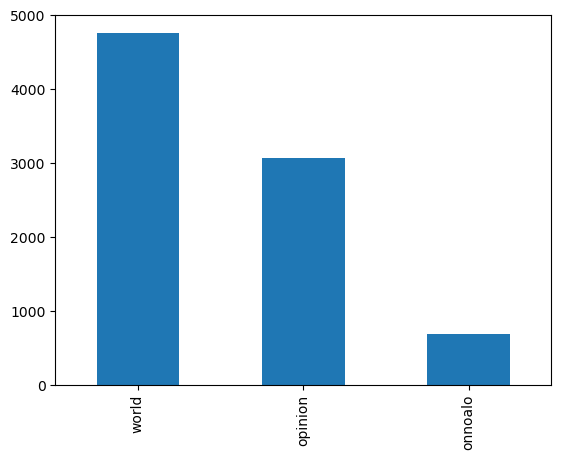

In [19]:
each_class.plot.bar()

In [20]:
X = df['body']
y=df['general_type']
X,y

(0       এক দিন আগেই লিখছি মার্সেল মার্সোকে নিয়ে। কাল আ...
 1       এখন অভিযুক্ত ব্যক্তিরা বলছেন, উইকিলিকসে তাঁদের...
 2       চীনে ভারী বৃষ্টিপাত থেকে সৃষ্ট বন্যা ও ভূমিধসে...
 3       জাপানের শীর্ষস্থানীয় অস্ত্রনির্মাতা প্রতিষ্ঠান...
 4       মিয়ানমারের সেনাসমর্থিত সরকারকে সংবাদ নিয়ন্ত্রণ...
                               ...                        
 8519    কর্মচারী প্রতিনিধিগণপ্রজাতন্ত্রী বাংলাদেশ সরকা...
 8520    শেষ হলো প্যারালিম্পিক ২০১২। টিকিট বিক্রি হয়েছে...
 8521    সাংবাদিক সমাজ যখন সাগর-রুনি হত্যাকারীদের বিচার...
 8522    ডিমের দাম বাড়তির মুখে আমদানি উন্মুক্ত করে দিয়ে...
 8523    মিয়ানমার সরকার সে দেশের বিভিন্ন কারাগারে থাকা ...
 Name: body, Length: 8524, dtype: object,
 0       opinion
 1       opinion
 2         world
 3         world
 4         world
          ...   
 8519    opinion
 8520    opinion
 8521    opinion
 8522    opinion
 8523      world
 Name: general_type, Length: 8524, dtype: object)

In [21]:
## Get the Dependent features
classes = list(y.unique())
classes, df.nunique()

(['opinion', 'world', 'onnoalo'],
 general_type       3
 body            8524
 dtype: int64)

In [22]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y, len(y)

(array([1, 1, 2, ..., 1, 1, 2]), 8524)

In [23]:
import numpy as np
unique_values, counts = np.unique(y, return_counts=True)
print(unique_values, counts)

[0 1 2] [ 692 3069 4763]


In [24]:
import re
from temp_stemmer.bangla_stemmer.stemmer.stemmer import BanglaStemmer  # for stemming 
st_words = ('অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ', 'অনুভূত', 'অনুযায়ী', 'অনুরূপ', 'অনুসন্ধান', 'অনুসরণ', 'অনুসারে', 'অনুসৃত', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অন্যত্র', 'অন্যভাবে', 'অন্যান্য', 'অপেক্ষাকৃতভাবে', 'অবধি', 'অবশ্য', 'অবশ্যই', 'অবস্থা', 'অবিলম্বে', 'অভ্যন্তরস্থ', 'অর্জিত', 'অর্থাত', 'অসদৃশ', 'অসম্ভাব্য', 'আইন', 'আউট', 'আক্রান্ত', 'আগামী', 'আগে', 'আগেই', 'আগ্রহী', 'আছে', 'আজ', 'আট', 'আদেশ', 'আদ্যভাগে', 'আন্দাজ', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদিগের', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'আশি', 'আশু', 'আসা', 'আসে', 'ই', 'ইচ্ছা', 'ইচ্ছাপূর্বক', 'ইতিমধ্যে', 'ইতোমধ্যে', 'ইত্যাদি', 'ইশারা', 'ইহা', 'ইহাতে', 'উক্তি', 'উচিত', 'উচ্চ', 'উঠা', 'উত্তম', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'উপলব্ধ', 'উপায়', 'উভয়', 'উল্লেখ', 'উল্লেখযোগ্যভাবে', 'উহার', 'ঊর্ধ্বতন', 'এ', 'এপর্যন্ত', 'এঁদের', 'এঁরা', 'এই', 'এইগুলো', 'এইভাবে', 'এক', 'একই', 'একটি', 'একদা', 'একবার', 'একভাবে', 'একরকম', 'একসঙ্গে', 'একা', 'একে', 'এক্', 'এখন', 'এখনও', 'এখনো', 'এখানে', 'এখানেই', 'এছাড়াও', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতদ্বারা', 'এতে', 'এদিকে', 'এদের', 'এপর্যন্ত', 'এবং', 'এবার', 'এমন', 'এমনকি', 'এমনকী', 'এমনি', 'এর', 'এরকম', 'এরা', 'এল', 'এলাকায়', 'এলাকার', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'ওহে', 'কক্ষ', 'কখন', 'কখনও', 'কত', 'কবে', 'কম', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করলো', 'করা', 'করাই', 'করাত', 'করার', 'করায়', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিল', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কর্তব্য', 'কাউকে', 'কাছ', 'কাছাকাছি', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কারণসমূহ', 'কারো', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিছুটা', 'কিছুনা', 'কিনা', 'কিন্তু', 'কিভাবে', 'কী', 'কূপ', 'কে', 'কেউ', 'কেউই', 'কেউনা', 'কেখা', 'কেন', 'কেবল', 'কেবা', 'কেস', 'কেহ', 'কোটি', 'কোথা', 'কোথাও', 'কোথায়', 'কোন', 'কোনও', 'কোনো', 'ক্রম', 'ক্ষেত্রে', 'কয়েক', 'কয়েকটি', 'খুঁজছেন', 'খুব', 'খোলা', 'খোলে', 'গড়', 'গত', 'গিয়ে', 'গিয়েছিলাম', 'গিয়েছে', 'গিয়ে', 'গিয়েছে', 'গুরুত্ব', 'গুলি', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'গোষ্ঠীবদ্ধ', 'গ্রহণ', 'গ্রুপ', 'ঘর', 'ঘোষণা', 'চলে', 'চান', 'চায়', 'চার', 'চালা', 'চালান', 'চালু', 'চায়', 'চেয়ে', 'চেয়েছিলেন', 'চেষ্টা', 'চেয়ে', 'ছয়', 'ছাড়া', 'ছাড়াছাড়ি', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'ছোট', 'জন', 'জনকে', 'জনাব', 'জনাবা', 'জনের', 'জন্য', 'জানতাম', 'জানতে', 'জানা', 'জানানো', 'জানায়', 'জানিয়ে', 'জানিয়েছে', 'জানে', 'জায়গা', 'জিজ্ঞাসা', 'জিজ্ঞেস', 'জিনিস', 'জে', 'জ্নজন', 'টা', 'টি', 'ঠিক', 'ঠিকআছে', 'ডগা', 'তখন', 'তত', 'তত্কারণে', 'তত্প্রতি', 'তথা', 'তদনুসারে', 'তদ্ব্যতীত', 'তন্নতন্ন', 'তবু', 'তবে', 'তরুণ', 'তা', 'তাঁকে', 'তাঁদের', 'তাঁর', 'তাঁরা', 'তাঁহারা', 'তাই', 'তাও', 'তাকে', 'তাতে', 'তাদের', 'তার', 'তারপর', 'তারপরেও', 'তারা', 'তারিখ', 'তারৈ', 'তাহলে', 'তাহা', 'তাহাতে', 'তাহাদিগকে', 'তাহাদেরই', 'তাহার', 'তিন', 'তিনি', 'তিনিও', 'তীক্ষ্ন', 'তুমি', 'তুলে', 'তেমন', 'তৈরীর', 'তো', 'তোমার', 'তোলে', 'থাকবে', 'থাকবেন', 'থাকা', 'থাকায়', 'থাকায়', 'থাকে', 'থাকেন', 'থেকে', 'থেকেই', 'থেকেও', 'দরকারী', 'দলবদ্ধ', 'দান', 'দিকে', 'দিতে', 'দিন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 'দিলেন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 'দু', 'দুই', 'দুটি', 'দুটো', 'দূরে', 'দেওয়ার', 'দেওয়া', 'দেওয়ার', 'দেখতে', 'দেখা', 'দেখাচ্ছে', 'দেখিয়েছেন', 'দেখে', 'দেখেন', 'দেন', 'দেয়', 'দেয়', 'দ্বারা', 'দ্বিগুণ', 'দ্বিতীয়', 'দ্য', 'ধরা', 'ধরে', 'ধামার', 'নতুন', 'নব্বই', 'নয়', 'নাই', 'নাকি', 'নাগাদ', 'নানা', 'নাম', 'নিচে', 'নিছক', 'নিজে', 'নিজেই', 'নিজেকে', 'নিজেদের', 'নিজেদেরকে', 'নিজের', 'নিতে', 'নিদিষ্ট', 'নিম্নাভিমুখে', 'নিয়ে', 'নির্দিষ্ট', 'নির্বিশেষে', 'নিশ্চিত', 'নিয়ে', 'নেই', 'নেওয়ার', 'নেওয়া', 'নেয়ার', 'নয়', 'পক্ষই', 'পক্ষে', 'পঞ্চম', 'পড়া', 'পণ্য', 'পথ', 'পয়েন্ট', 'পর', 'পরন্তু', 'পরবর্তী', 'পরিণত', 'পরিবর্তে', 'পরে', 'পরেই', 'পরেও', 'পর্যন্ত', 'পর্যাপ্ত', 'পাঁচ', 'পাওয়া', 'পাচ', 'পায়', 'পারা', 'পারি', 'পারিনি', 'পারে', 'পারেন', 'পালা', 'পাশ', 'পাশে', 'পিছনে', 'পিঠের', 'পুরোনো', 'পুরোপুরি', 'পূর্বে', 'পৃষ্ঠা', 'পৃষ্ঠাগুলি', 'পেছনে', 'পেয়েছেন', 'পেয়ে', 'পেয়্র্', 'প্রকৃতপক্ষে', 'প্রণীত', 'প্রতি', 'প্রথম', 'প্রদত্ত', 'প্রদর্শনী', 'প্রদর্শিত', 'প্রধানত', 'প্রবলভাবে', 'প্রভৃতি', 'প্রমাণীকরণ', 'প্রযন্ত', 'প্রয়োজন', 'প্রয়োজনীয়', 'প্রসূত', 'প্রাক্তন', 'প্রাথমিক', 'প্রাথমিকভাবে', 'প্রান্ত', 'প্রাপ্ত', 'প্রায়', 'প্রায়ই', 'প্রায়', 'ফলাফল', 'ফলে', 'ফিক্স', 'ফিরে', 'ফের', 'বক্তব্য', 'বছর', 'বড়', 'বদলে', 'বন', 'বন্ধ', 'বরং', 'বরাবর', 'বর্ণন', 'বর্তমান', 'বলতে', 'বলল', 'বললেন', 'বলা', 'বলে', 'বলেছেন', 'বলেন', 'বসে', 'বহু', 'বা', 'বাঁক', 'বাইরে', 'বাকি', 'বাড়ি', 'বাতিক', 'বাদ', 'বাদে', 'বার', 'বাহিরে', 'বিনা', 'বিন্দু', 'বিভিন্ন', 'বিশেষ', 'বিশেষণ', 'বিশেষত', 'বিশেষভাবে', 'বিশ্ব', 'বিষয়টি', 'বুঝিয়ে', 'বৃহত্তর', 'বের', 'বেশ', 'বেশি', 'বেশী', 'ব্যতীত', 'ব্যবহার', 'ব্যবহারসমূহ', 'ব্যবহৃত', 'ব্যাক', 'ব্যাপকভাবে', 'ব্যাপারে', 'ভবিষ্যতে', 'ভান', 'ভাবে', 'ভাবেই', 'ভাল', 'ভিতরে', 'ভিন্ন', 'ভিন্নভাবে', 'মত', 'মতো', 'মতোই', 'মধ্যভাগে', 'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মনে', 'মনে হয়', 'মস্ত', 'মহান', 'মাত্র', 'মাধ্যম', 'মাধ্যমে', 'মান', 'মানানসই', 'মানুষ', 'মানে', 'মামলা', 'মিলিয়ন', 'মুখ', 'মূলত', 'মোট', 'মোটেই', 'যখন', 'যখনই', 'যত', 'যতটা', 'যথা', 'যথাক্রমে', 'যথেষ্ট', 'যদি', 'যদিও', 'যন্ত্রাংশ', 'যা', 'যাঁর', 'যাঁরা', 'যাই', 'যাওয়া', 'যাওয়ার', 'যাওয়া', 'যাওয়ার', 'যাকে', 'যাচ্ছে', 'যাতে', 'যাদের', 'যান', 'যাবে', 'যায়', 'যার', 'যারা', 'যাহার', 'যাহোক', 'যিনি', 'যে', 'যেখানে', 'যেখানেই', 'যেটি', 'যেতে', 'যেন', 'যেমন', 'যেহেতু', 'যোগ', 'রকম', 'রয়েছে', 'রাখা', 'রাখে', 'রাজী', 'রাজ্যের', 'রেখে', 'রয়েছে', 'লক্ষ', 'লাইন', 'লাল', 'শত', 'শব্দ', 'শীঘ্র', 'শীঘ্রই', 'শুধু', 'শুরু', 'শুরুতে', 'শূন্য', 'শেষ', 'সংক্রান্ত', 'সংক্ষিপ্ত', 'সংক্ষেপে', 'সংখ্যা', 'সংখ্যার', 'সংশ্লিষ্ট', 'সক্ষম', 'সঙ্গে', 'সঙ্গেও', 'সত্য', 'সত্যিই', 'সদয়', 'সদস্য', 'সদস্যদের', 'সফলভাবে', 'সব', 'সবচেয়ে', 'সবাই', 'সবার', 'সময়', 'সমস্ত', 'সমান', 'সম্পন্ন', 'সম্প্রতি', 'সম্ভব', 'সম্ভবত', 'সম্ভাব্য', 'সরাইয়া', 'সর্বত্র', 'সর্বদা', 'সর্বস্বান্ত', 'সহ', 'সহিত', 'সাত', 'সাধারণ', 'সাধারণত', 'সাব', 'সাবেক', 'সামগ্রিক', 'সামনে', 'সামান্য', 'সাম্প্রতিক', 'সুতরাং', 'সুত্র', 'সূচক', 'সে', 'সে হবে', 'সেই', 'সেকেন্ড', 'সেখান', 'সেখানে', 'সেগুলো', 'সেটা', 'সেটাই', 'সেটাও', 'সেটি', 'সেরা', 'স্টপ', 'স্থাপিত', 'স্পষ্ট', 'স্পষ্টত', 'স্পষ্টতই', 'স্ব', 'স্বয়ং', 'স্বাগত', 'স্বাভাবিকভাবে', 'স্বার্থ', 'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ায়', 'হওয়ার', 'হচ্ছে', 'হত', 'হতে', 'হতেই', 'হন', 'হবে', 'হবেন', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 'হয়েছেন', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হাজার', 'হায়', 'হারানো', 'হিসাবে', 'হৈলে', 'হোক', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 'হয়েছেন', 'অংশ')
len(st_words)

732

In [25]:
# para = df['body'][387]
# sentences = re.sub(r'\n{2,}|\n|।|,', "", para)
# sentences

In [26]:
corpus = []
no_of_words = 0
for i in range(df.shape[0]):
    para = df['body'][i]
    sentences = re.sub(r'\n{2,}|\n|।|,|!|@|<|>|#|\$|%|\^|&|\*|\(|\)|\\|/|\u200B', "", para)
    words = sentences.split()
    

    words = [word for word in words if word not in st_words]
#     words = [word for word in words if not word in stopwords.words('english')]
    words = [BanglaStemmer().stem(word) for word in words]
    no_of_words += len(words) 
    line = ' '.join(words)
    corpus.append(line)

In [27]:
# avg word/news 
no_of_words/df.shape[0]

277.4797043641483

In [28]:
corpus[0]

'লিখছি মার্সেল মার্সো কাল প্রস্তুত হওয় সার কাটানোর পালাইতিহাস বল ফরাসি বিপ্লব সময় জনগণ মুখ কথ ওপর নিয়ন্ত্রণ আরোপ মূকাভিনয়শিল্প দেশের বিক্ষোভ জাগা তুলেছিল বিপ্লব অবশ্যম্ভাবী সাফল্য অত্যন্ত গুরুত্বপূর্ণ ভূমিকা পালন মুখ কথানির্ভর প্রচলিত ভাষা অনুপস্থিতি সত্ত্বে অনুপম শিল্পে ‘মূক ভাষা’র এমন কার্যকর সংযোগ স্থাপন ক্ষমতাসুপ্রাচীন ঐতিহ্যময় মূকাভিনয়শিল্প নিরন্তর ব্যবহারিক গবেষণ উঁচু ধরেছি মূকাভিনয়শিল্পী-মূকাভিনয়গুরু ‘মাস্ অব মাইম’ মার্সেল মার্সো প্রকৃত মার্সেল ম্যাঙ্গেল জন্ম ১৯২৩-এর ২২ মার্চ ফ্রান্স স্ট্রাসবুর্গ শহরে শৈশব দড়াবাজি অভিনয় সৃষ্টিশীল অনুকরণ অনন্যসাধারণ ক্ষমতাসম্পন্ন মার্সো অনুপ্রাণিত হয়েছি চার্লি চ্যাপলিন বাস্ কিটন প্রমুখ নির্বাক চলচ্চিত্র চ্যাপলিন ‘প্রেরণা’ খ্যাতির চূড়ায় অবস্থানকালে ষাট দশক মার্সোর প্যারিস ওরাল বিমানবন্দরে চার্লি চ্যাপলিন সাক্ষাৎ প্রথমে চ্যাপলিন ‘সাদা মুখ বিখ্যাত মানুষ’ মার্সোর সৃষ্ট ‘বিপ’ চরিত্র অঙ্গরচনা সম্বোধন করেছিলেন—যা মার্সো জীবনে শ্রেষ্ঠ সম্মান আমৃত্যু গর্বিতভাবে স্মরণ করতেনদ্বিতীয় বিশ্বযুদ্ধ মার্সো প্যারিসে ‘স্কুল অব ড্রামাটিক আর্টস’-এর পাঠ সমাপন স্বনামখ্য

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=1000,ngram_range=(1,3))
X = tv.fit_transform(corpus).toarray()

In [30]:
X.shape

(8524, 1000)

In [31]:
y

array([1, 1, 2, ..., 1, 1, 2])

In [32]:
tv.get_feature_names_out()[:20]

array(['comp', 'অক', 'অক বর', 'অগ', 'অগ রগত', 'অঙ', 'অঙ গর', 'অজ', 'অঞ',
       'অঞ চল', 'অত', 'অত যন', 'অদ', 'অধ', 'অধ পক', 'অধ শন', 'অন',
       'অন তর', 'অন তর বর', 'অন দন'], dtype=object)

In [33]:
count_df = pd.DataFrame(X,columns=tv.get_feature_names_out()).assign(target=y)
count_df

,comp,অক,অক বর,অগ,অগ রগত,অঙ,অঙ গর,অজ,অঞ,অঞ চল,...,২৭,২৮,২৯,৩০,৪০,৫০,৬০,৭০,৮০,target
0,0.000000,0.000000,0.000000,0.000000,0.0,0.038066,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
1,0.028640,0.023108,0.000000,0.023232,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.251498,0.0,0.0,0.0,0.000000,0.239933,0.000000,2
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.105610,2
4,0.000000,0.000000,0.000000,0.000000,0.0,0.187225,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
8520,0.055804,0.045026,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.065987,1
8521,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
8522,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.055991,0.000000,0.000000,1


In [34]:
count_df.shape

(8524, 1001)

In [35]:
count_df.to_excel("pro-part-2.xlsx", index = False, header = False)